### Task - 1(L-2):Predictive Modeling(Regression)

**1.Importing Librabries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
 

In [2]:
df = pd.read_csv("house data.csv")

**2. Understanding the Data (Initial Observation)**

The first step in any data science project is to gain a general understanding of the dataset.
B
y using the head() function, we take a quick look at the first few rows to answer questions like:

What are the column names?

What types of data are included?

Besides the target variable SalePrice, what other features are available?

This step helps build an initial connection with the data and sets the foundation for deeper analysis.

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**My Initial Observations**

After reviewing the first five rows of the dataset, I noted several important insights:

- The price column stands out as the target variable, representing the sale price of the houses. This is the value we aim to predict using regression models.
- The date column contains temporal information, indicating when the house was sold. It also raises the question of whether time-series analysis might be applicable.
- Features like bedrooms, bathrooms, sqft_living, sqft_lot, floors, and yr_built are numerical and reflect the physical characteristics of the properties.
- Columns such as waterfront, view, and condition are numerically encoded but seem to have categorical meaning, which may require reformatting later.
- Location-related fields like street, city, statezip, and country are also present. However, I believe that free-text columns like street may not directly contribute value to the model without proper preprocessing.

Overall, the dataset appears to be rich and well-structured for predictive modeling.

Next, I will explore the data types and check for any missing values to prepare for deeper analysis.

**3. General Overview of the Dataset**

Using the info() function, I can gather important structural information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Observations on Data Types:**
- Columns like date, street, city, statezip, and country are of type object (text).
- These may require preprocessing and encoding before being used in modeling.
- Features such as yr_renovated and yr_built are numeric, but in some contexts they could be treated as categorical or temporal features.
- Columns like price, bedrooms, bathrooms, and sqft_living are numeric (float64, int64) and seem suitable for regression modeling.
- Variables such as waterfront, view, and condition are numerically coded, but they appear to have categorical meaning, so they might need to be converted accordingly.

Overall, the dataset looks clean, well-structured, and ready for modeling.

In the next step, I will generate statistical summaries to analyze the distribution of each feature.

**4. Statistical Summary of Numerical Features**

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**My Observations:**

Based on the output of df.describe(), I identified several important points:

- The price variable has a minimum value of 0, which indicate an incorrectly entered value. I will visualize this to check whether it's an outlier.
- The average price is around 551,000, but the maximum is an extreme 26,590,000 — a strong indicator of potential outliers.
- Features like sqft_living, sqft_lot, and sqft_basement also show maximum values that are significantly higher than the median, suggesting right-skewed distributions.
- The bedrooms column has a maximum of 9, but the minimum is 0 — which seems suspicious. 
- The bathrooms column also includes 0 as a minimum value. I plan to check how many rows have zero values and consider removing or handling them differently.
- In yr_renovated, the median is 0, indicating that most houses have never been renovated. This column might be converted into a binary feature like "HasBeenRenovated".
- The floors feature ranges from 1 to 3.5 and looks normal — nothing alarming here.
- Columns like waterfront, view, and condition, although currently numeric, actually carry categorical meaning. I’ll likely convert them into categorical format later.

Overall, this statistical summary provided valuable insights.

My next step will be to dive deeper into the data using correlation analysis and outlier visualizations.

**5. Exploratory Data Visualization (EDA)**

*5.1 Distribution of House Prices*

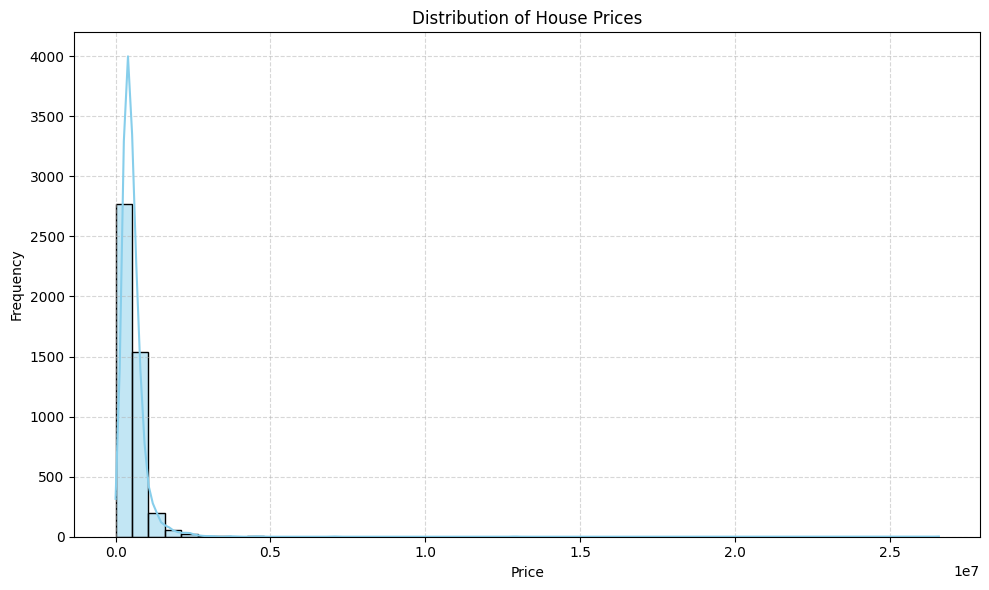

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Most houses are priced under $1 million, but there are a few extremely expensive properties that stretch the scale way to the right. Because of this, it's kind of hard to see the real pattern in the majority of the data.

This tells me two things:

- I probably need to handle outliers before modeling, so they don’t dominate the results.
- And maybe also apply a log transformation to normalize the target and make it easier for regression models to learn.

**5.2 Number of Bedrooms**

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\1086237529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df, palette='pastel')


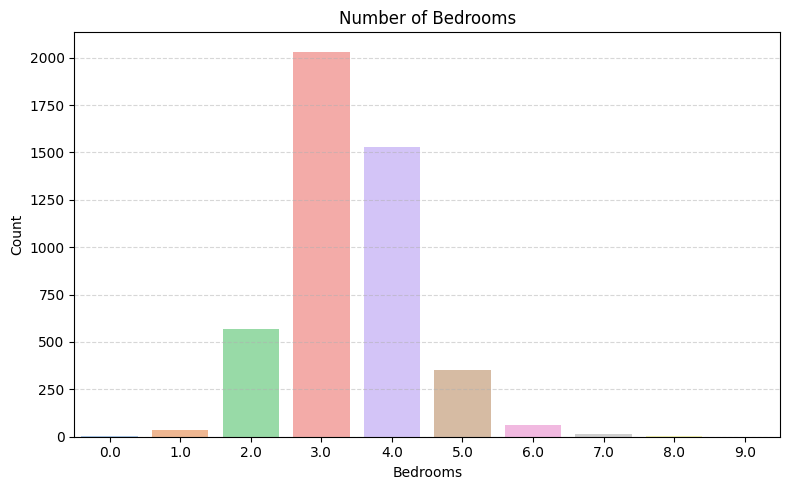

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=df, palette='pastel')
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Looking at the number of bedrooms, it’s pretty clear that most houses have 3 or 4 bedrooms, which totally makes sense for average family homes.

What surprised me a bit is that there are actually some houses with 0 or 1 bedroom, which could be studio-type homes or possibly data entry issues.
There are also a few houses with 6, 7, or even more bedrooms, but those are rare and might be considered outliers.

*5.3 Number of Bathrooms*

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\3398639659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=df, palette='Set2')


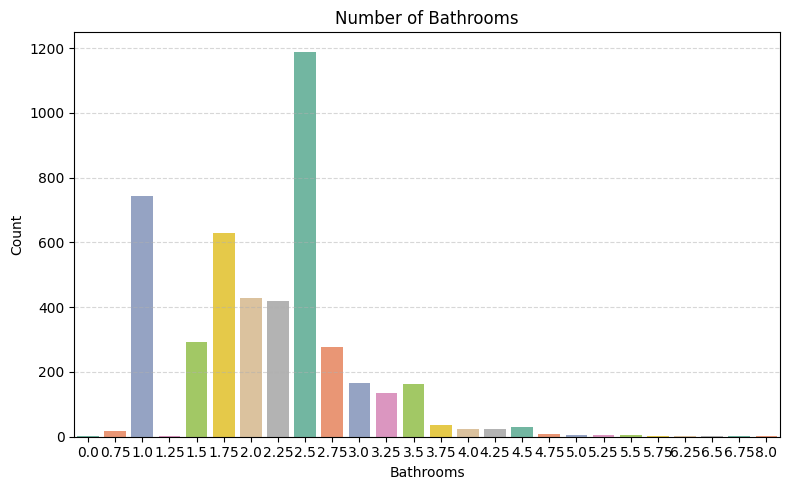

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bathrooms', data=df, palette='Set2')
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

When I checked the bathroom counts, I noticed that most houses have between 1.0 and 2.5 bathrooms, which is pretty typical.
The highest peak is at 2.5, which probably means a mix of full and half bathrooms — like two full baths and one half bath.

There are also a lot of fractional values like 1.75 or 2.25, which honestly made me curious. I think they reflect different combinations of full and half baths.

Another thing I saw is that there are some extreme values like 6 or more bathrooms, but they’re very rare — probably luxury houses or possible outliers.

**5.4 Price vs Condition**

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\1306753824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')


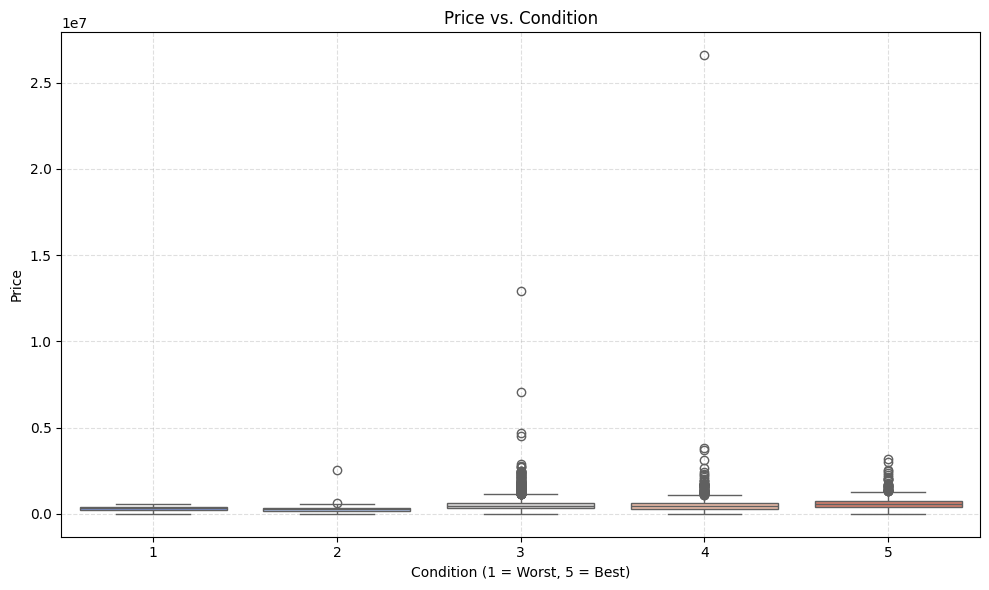

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

This plot shows how house prices vary depending on the overall condition of the property, from 1 (worst) to 5 (best).

There are also a lot of outliers in every group, especially condition 3 and 4 — some of those are extremely high, which might be skewing the results.

This tells me that condition might not be a strong standalone predictor of price.

**5.5 Price vs Sqft Living**

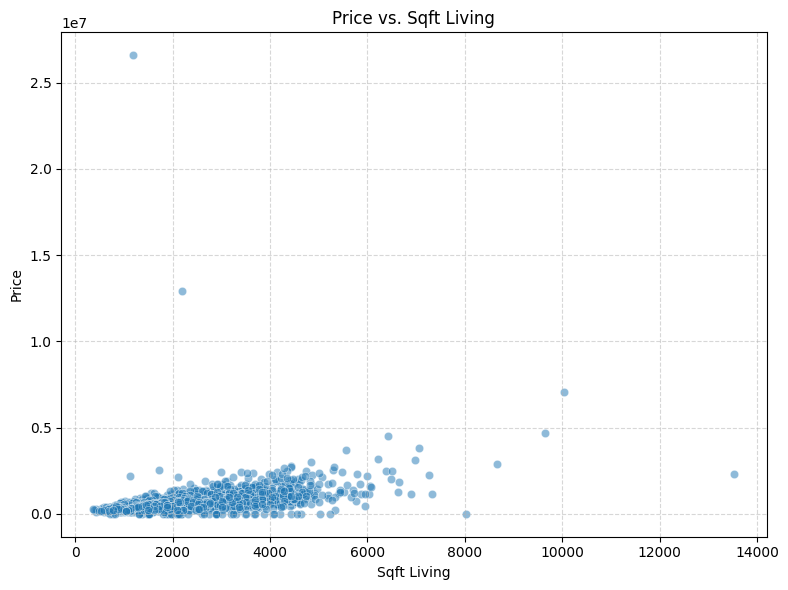

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between living area (in square feet) and house price. And honestly, the trend is kind of what I expected — as the living space increases, the price tends to go up too.

Also, I noticed a few extreme values way off to the right (like homes with over 10,000 sqft). These could be outliers or luxury properties, so I might consider handling them separately during preprocessing.

**5.6 Top 10 Cities**

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\2219622949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")


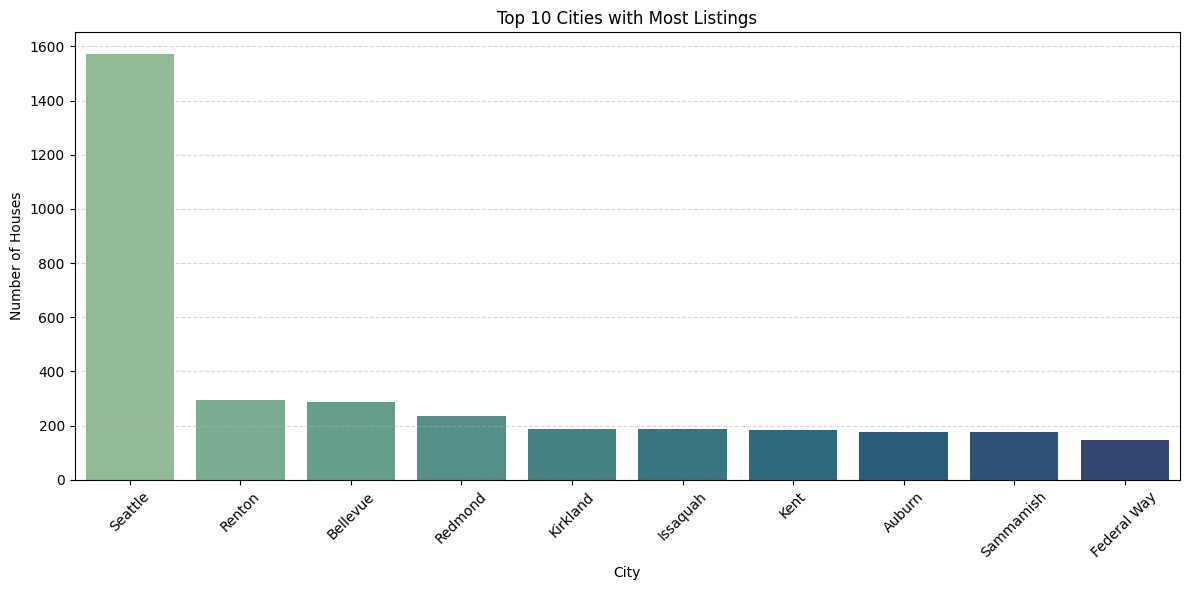

In [11]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

This plot shows the top 10 cities with the highest number of house listings, and honestly, it’s no surprise that Seattle dominates the list. There are way more listings in Seattle compared to the other cities — it’s not even close.

The rest of the cities like Renton, Bellevue, and Redmond also have a decent number of listings, but still far behind Seattle

**5.7 Correlation Matrix**

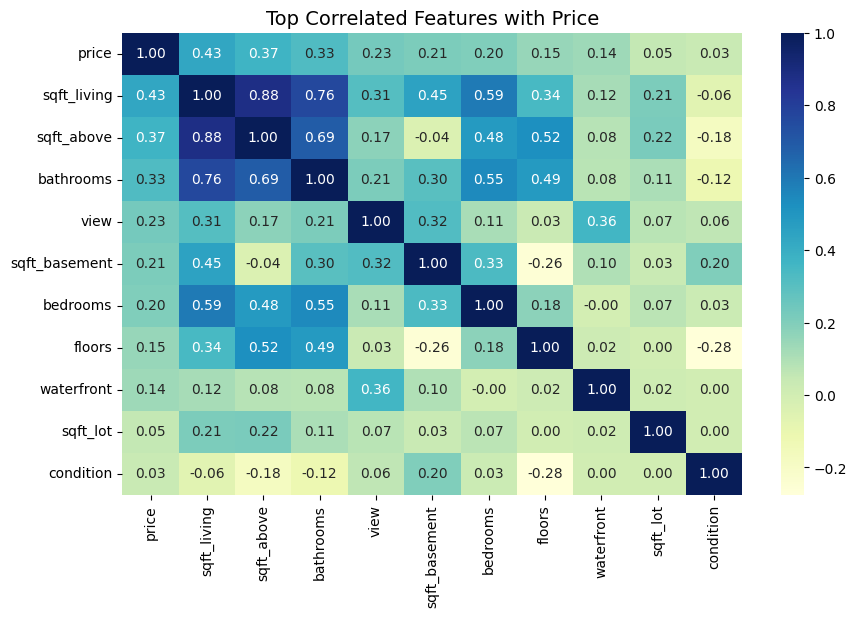

In [12]:
# Correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Top 10 features most correlated with price (including price itself)
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(11)

# Heatmap of those features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Top Correlated Features with Price", fontsize=14)
plt.show()

The heatmap above displays the correlations between the target variable price and the top numerical features in the dataset.

- sqft_living has the strongest correlation with price (0.43), indicating that larger living areas are a strong predictor of higher house prices.
- bathrooms, sqft_above, and sqft_basement also show moderate correlations, making them valuable features for regression models.
- bedrooms, view, and floors have weaker but still potentially useful relationships.
- Features like sqft_lot and condition show very weak correlations and may not add significant predictive value.

I will prioritize features with higher correlations in future modeling steps and watch for multicollinearity, especially between sqft_living and sqft_above.

**6. Outlier Detection and Removal**

In [13]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Filter data within the calculated bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Displaying initial shape of the dataset
print(f"Original dataset shape: {df.shape}")

# Columns to clean (based on domain knowledge and model requirements)
columns_to_clean = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 'sqft_lot']

# Removing outliers for each selected column
for col in columns_to_clean:
    original_shape = df.shape[0]  # Initial row count
    df = remove_outliers_iqr(df, col)  # Removing outliers
    new_shape = df.shape[0]  # Row count after outlier removal
    # Print how many outliers were removed
    print(f"Removed {original_shape - new_shape} outliers from '{col}' column.")

# Final shape after outlier removal
print(f"\nFinal dataset shape after outlier removal: {df.shape}")

# Summary of the cleaned data
print("\nCleaned Data Overview:")
print(df.describe())


Original dataset shape: (4600, 18)
Removed 240 outliers from 'price' column.
Removed 76 outliers from 'sqft_living' column.
Removed 53 outliers from 'bathrooms' column.
Removed 81 outliers from 'bedrooms' column.
Removed 63 outliers from 'sqft_above' column.
Removed 55 outliers from 'sqft_basement' column.
Removed 444 outliers from 'sqft_lot' column.

Final dataset shape after outlier removal: (3588, 18)

Cleaned Data Overview:
              price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  3.588000e+03  3588.000000  3588.000000  3588.000000   3588.000000   
mean   4.610013e+05     3.280100     2.018464  1881.248328   7086.753902   
std    2.018767e+05     0.779136     0.653626   647.754684   3406.775422   
min    0.000000e+00     2.000000     0.750000   580.000000    681.000000   
25%    3.080000e+05     3.000000     1.500000  1390.000000   4725.000000   
50%    4.300000e+05     3.000000     2.000000  1830.000000   7068.000000   
75%    5.800000e+05     4.000000    

We focused on the following numerical columns to eliminate extreme values:

- price: To remove houses with excessively high prices.
- sqft_living: To eliminate unusually large living areas.
- bathrooms: To filter out properties with an exceptionally high number of bathrooms.
- bedrooms: To remove houses with an abnormal number of bedrooms.
- sqft_above: To eliminate homes with extremely large above-ground living spaces.
- sqft_basement: To remove properties with very large basement areas.
- sqft_lot: To filter out houses with exceptionally large lot sizes.

Outlier Removal Summary: 

After applying the IQR method, we successfully removed 1012 outliers from the dataset. This process reduced the data size from 4600 to 3588 rows, significantly enhancing data consistency. The cleaned data now shows a more stable distribution, minimizing the impact of extreme values, which will likely improve model performance.

**7. Feature Engineering**

In [14]:
#Extract year from date

df['year_sold'] = pd.to_datetime(df['date']).dt.year

# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']

# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


**8. Train/Test Split**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

9. Modeling (Model Training)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# store the trained models here
trained_models = {}

# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.


**10. Model Evaluation & Comparison**

**10.1 Linear Regression – Evaluation**

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get the trained Linear Regression pipeline
lr_model = trained_models["Linear Regression"]

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression Evaluation Metrics:")
print(f"MAE  = {mae_lr:.2f}")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R²   = {r2_lr:.4f}")


Linear Regression Evaluation Metrics:
MAE  = 66894.08
RMSE = 104615.67
R²   = 0.7374


**10.2 Decision Tree Regressor – Evaluation**

In [18]:
# Get the trained Decision Tree model
dt_model = trained_models["Decision Tree"]

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("Decision Tree Regressor Evaluation Metrics:")
print(f"MAE  = {mae_dt:.2f}")
print(f"RMSE = {rmse_dt:.2f}")
print(f"R²   = {r2_dt:.4f}")


Decision Tree Regressor Evaluation Metrics:
MAE  = 100565.50
RMSE = 149387.33
R²   = 0.4645


**10.3 Random Forest Regressor – Evaluation**

In [19]:
# Get the trained Random Forest model
rf_model = trained_models["Random Forest"]

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Regressor Evaluation Metrics:")
print(f"MAE  = {mae_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R²   = {r2_rf:.4f}")


Random Forest Regressor Evaluation Metrics:
MAE  = 77455.14
RMSE = 120017.94
R²   = 0.6544


**10.4 Gradient Boosting Regressor – Evaluation**

In [20]:
# Get the trained Gradient Boosting model
gb_model = trained_models["Gradient Boosting"]

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Regressor Evaluation Metrics:")
print(f"MAE  = {mae_gb:.2f}")
print(f"RMSE = {rmse_gb:.2f}")
print(f"R²   = {r2_gb:.4f}")


Gradient Boosting Regressor Evaluation Metrics:
MAE  = 81955.89
RMSE = 120997.40
R²   = 0.6487


**10.5 Final Comparison & Best Model Summary**

In [21]:
# Create dictionary with raw scores
model_results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_lr, mae_dt, mae_rf, mae_gb],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_gb],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_gb]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Round values to 2 decimals
results_df[['MAE', 'RMSE', 'R² Score']] = results_df[['MAE', 'RMSE', 'R² Score']].round(2)

# Sort by RMSE (ascending = better model)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

# Show final table
results_df


,Model,MAE,RMSE,R² Score
0,Linear Regression,66894.08,104615.67,0.74
1,Random Forest,77455.14,120017.94,0.65
2,Gradient Boosting,81955.89,120997.40,0.65
3,Decision Tree,100565.50,149387.33,0.46


**11. Plot RMSE Comparison**

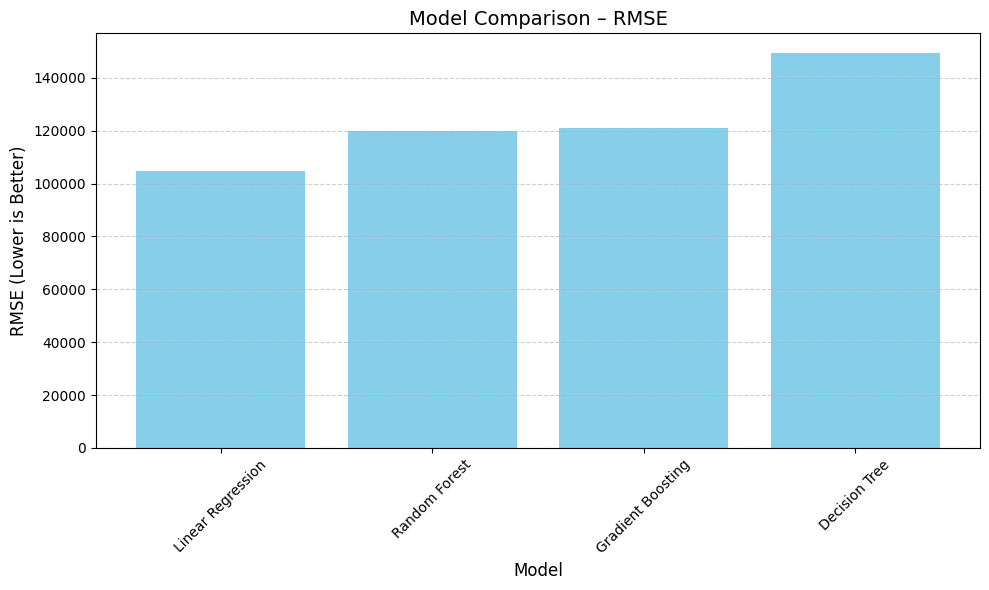

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('Model Comparison – RMSE', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE (Lower is Better)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**12. Plot MAE Comparison**

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\3566543076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, palette="Oranges_d")


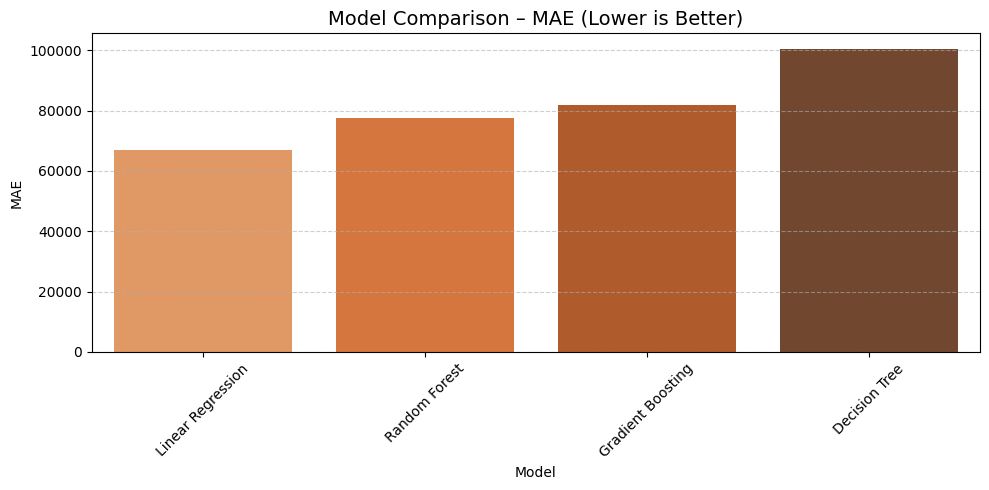

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MAE", data=results_df, palette="Oranges_d")
plt.title("Model Comparison – MAE (Lower is Better)", fontsize=14)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**13. Plot R2-Score Comparison**

C:\Users\kesha\AppData\Local\Temp\ipykernel_13240\626920699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="Greens_d")


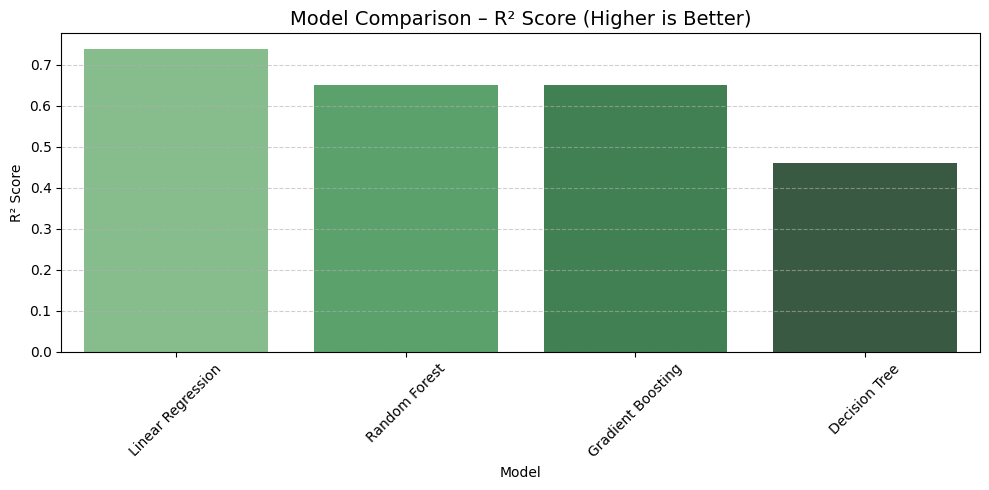

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="Greens_d")
plt.title("Model Comparison – R² Score (Higher is Better)", fontsize=14)
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

**Best Model Explanation**

**Linear Regression** delivered the best performance among all tested models, achieving the **lowest MAE (66,894.08), the lowest RMSE (104,615.67), and the highest R² score (0.74).**

 This indicates that, for our dataset, Linear Regression is providing the most accurate predictions and capturing the linear relationships between the features and house price effectively.

Other models, such as Random Forest, Gradient Boosting, and Decision Tree, resulted in higher error metrics and lower R² scores (all R² ≤ 0.65). This suggests they did not generalize as well on the current data setup or may require further tuning to outperform Linear Regression.

#### **14. Top 15 Most Important Features:**

In [25]:
# Extract the trained Linear Regression pipeline
lr_pipeline = trained_models["Linear Regression"]
lr_model = lr_pipeline.named_steps['regressor']

# Get feature names after preprocessing
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'sqft_above', 'sqft_basement', 'house_age']
cat_features = lr_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(
    ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated'])

# Combine all feature names
feature_names = list(num_features) + list(cat_features)

# Get coefficients and create importance DataFrame
coefficients = lr_model.coef_
feature_importance = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value (most important first)
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("Top 15 Most Important Features:")
print(feature_importance.head(15))


Top 15 Most Important Features:
                     Feature    Coefficient  Abs_Coefficient
112        statezip_WA 98112  263065.181629    263065.181629
111        statezip_WA 98109  259914.209081    259914.209081
132        statezip_WA 98198 -254231.472080    254231.472080
64         statezip_WA 98004  234918.929179    234918.929179
130        statezip_WA 98178 -213588.919585    213588.919585
117        statezip_WA 98119  212924.143918    212924.143918
131        statezip_WA 98188 -206659.211899    206659.211899
60         city_Yarrow Point -203053.366054    203053.366054
107        statezip_WA 98105  199606.300197    199606.300197
105        statezip_WA 98102  185975.121060    185975.121060
128        statezip_WA 98168 -181517.537899    181517.537899
125        statezip_WA 98148 -174871.145581    174871.145581
23             city_Bellevue  168859.042291    168859.042291
22   city_Beaux Arts Village  152480.790930    152480.790930
34          city_Federal Way -150735.922508    150735

#### **15. Top correlated features:**

In [26]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)

# Select top correlated features (excluding price itself)
top_features = price_corr.drop('price').head(10).index.tolist()
print("Top correlated features:", top_features)

Top correlated features: ['sqft_living', 'sqft_above', 'bathrooms', 'floors', 'bedrooms', 'sqft_basement', 'view', 'has_been_renovated', 'condition', 'waterfront']


#### **16. RFE Selected Features:

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a new Linear Regression model for RFE
lr_rfe = LinearRegression()

# Apply RFE to select top features
rfe = RFE(estimator=lr_rfe, n_features_to_select=10)
X_train_transformed = lr_pipeline.named_steps['preprocessor'].fit_transform(X_train)
rfe.fit(X_train_transformed, y_train)

# Get selected features
selected_features = [feature_names[i] for i, selected in enumerate(rfe.support_) if selected]
print("RFE Selected Features:", selected_features)


RFE Selected Features: ['condition_1', 'city_Bellevue', 'city_Sammamish', 'statezip_WA 98004', 'statezip_WA 98033', 'statezip_WA 98040', 'statezip_WA 98105', 'statezip_WA 98109', 'statezip_WA 98112', 'statezip_WA 98119']


#### **17. Statistically Selected Features with F-scores:**

In [28]:
from sklearn.feature_selection import f_regression, SelectKBest

# Select top k features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=10)
X_train_transformed = lr_pipeline.named_steps['preprocessor'].fit_transform(X_train)
X_selected = selector.fit_transform(X_train_transformed, y_train)

# Get selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
feature_scores = selector.scores_[selected_indices]

print("Statistically Selected Features with F-scores:")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score:.2f}")


Statistically Selected Features with F-scores:
bedrooms: 190.49
bathrooms: 554.20
sqft_living: 1352.78
floors: 192.34
sqft_above: 778.70
sqft_basement: 121.03
view_0: 131.13
city_Auburn: 111.72
city_Bellevue: 168.66
statezip_WA 98004: 107.38


#### **17. VIF Analysis:**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for numerical features only
X_numeric = df[num_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

# Features with VIF > 5 might have multicollinearity issues
print("VIF Analysis:")
print(vif_data.sort_values('VIF', ascending=False))


VIF Analysis:
         Feature        VIF
2    sqft_living        inf
5     sqft_above        inf
6  sqft_basement        inf
1      bathrooms  27.708270
0       bedrooms  27.064246
4         floors  15.860556
3       sqft_lot   6.371392
7      house_age   3.341529


e:\keshav1086\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### **18. Saving features for prediction**

In [30]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Based on feature importance analysis, select top features
# These would be determined from our feature engineering step
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement',
    'floors', 'waterfront', 'view', 'condition', 'city', 'statezip', 
    'house_age', 'has_been_renovated'
]

# Prepare our data with selected features only
X_selected = df[selected_features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Define preprocessing for numerical and categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 
                     'sqft_basement', 'floors', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 
                       'has_been_renovated']

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create and train the final model pipeline
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
final_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(final_model, 'house_price_model.pkl')

# Save feature names for the web app
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'all_features': selected_features
}
joblib.dump(feature_info, 'feature_info.pkl')


['feature_info.pkl']

#### **19. Final selected features:**


In [31]:
# Select features avoiding multicollinearity and using top performers
selected_features = [
    # Numerical features (avoiding highly correlated ones)
    'bedrooms', 'bathrooms', 'sqft_living',  # Use only sqft_living, not sqft_above
    'floors', 'house_age',
    
    # Categorical features with high importance
    'view', 'condition', 'waterfront', 'has_been_renovated',
    
    # Top location features from your coefficient analysis
    'city', 'statezip'
]

print("Final selected features:", selected_features)


Final selected features: ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'house_age', 'view', 'condition', 'waterfront', 'has_been_renovated', 'city', 'statezip']


#### **20. Using Flask to creat webpage for predicting the house price**

In [32]:
    # app.py
    from flask import Flask, render_template, request, jsonify
    import joblib
    import pandas as pd
    import numpy as np
    import os
    import sys

    # Initialize Flask app
    app = Flask(__name__)

    # Global variables for model and features
    model = None
    feature_info = None

    def load_model_safely():
        """Load model with proper error handling"""
        global model, feature_info
        
        try:
            # Check if files exist
            if not os.path.exists('house_price_model.pkl'):
                print("❌ house_price_model.pkl not found!")
                print("Current directory:", os.getcwd())
                print("Files available:", os.listdir('.'))
                return False
                
            if not os.path.exists('feature_info.pkl'):
                print("❌ feature_info.pkl not found!")
                return False
            
            # Load the model
            model = joblib.load('house_price_model.pkl')
            feature_info = joblib.load('feature_info.pkl')
            
            print("✅ Model and feature info loaded successfully!")
            return True
            
        except Exception as e:
            print(f"❌ Error loading files: {str(e)}")
            return False

    @app.route('/')
    def home():
        """Home page route"""
        return render_template('index.html')

    @app.route('/predict', methods=['POST'])
    def predict():
        """Prediction endpoint"""
        try:
            if model is None:
                return jsonify({
                    'success': False,
                    'error': 'Model not loaded properly'
                })
            
            # Get data from request
            data = request.get_json()
            
            # Create DataFrame with the input data
            input_df = pd.DataFrame([data])
            
            # Make prediction
            prediction = model.predict(input_df)[0]
            
            # Format prediction
            formatted_prediction = f"${prediction:,.2f}"
            
            return jsonify({
                'success': True,
                'prediction': formatted_prediction,
                'raw_prediction': float(prediction)
            })
            
        except Exception as e:
            return jsonify({
                'success': False,
                'error': f'Prediction error: {str(e)}'
            })

    @app.route('/health')
    def health_check():
        """Health check endpoint"""
        return jsonify({
            'status': 'healthy',
            'model_loaded': model is not None,
            'feature_info_loaded': feature_info is not None
        })

    # Initialize the app
    if __name__ == '__main__':
        print("🚀 Starting House Price Predictor...")
        
        # Try to load model
        if load_model_safely():
            print("✅ All components loaded successfully!")
            print("🌐 Starting Flask server...")
            try:
                app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)
            except Exception as e:
                print(f"❌ Flask server error: {str(e)}")
                print("💡 Try running on a different port...")
                app.run(host='127.0.0.1', port=5001, debug=True, use_reloader=False)
        else:
            print("❌ Cannot start app - model files missing or corrupted")
            print("\n🔧 To fix this:")
            print("1. Run your model training code to generate the .pkl files")
            print("2. Make sure both files are in the same directory as app.py")
            sys.exit(1)

🚀 Starting House Price Predictor...
✅ Model and feature info loaded successfully!
✅ All components loaded successfully!
🌐 Starting Flask server...
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Aug/2025 10:33:55] "GET / HTTP/1.1" 200 -


#### **21.Created the Model Training Script**

In [34]:
# create_model.py
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Based on our feature analysis, selecting optimal features
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'house_age',
    'view', 'condition', 'waterfront', 'has_been_renovated', 'city', 'statezip'
]

# Prepare our data
X_selected = df[selected_features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Define feature types
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'house_age']
categorical_features = ['view', 'condition', 'waterfront', 'has_been_renovated', 'city', 'statezip']

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create final model
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
print("🏃‍♂️ Training model...")
final_model.fit(X_train, y_train)

# Evaluate
train_score = final_model.score(X_train, y_train)
test_score = final_model.score(X_test, y_test)
print(f"✅ Training R² score: {train_score:.4f}")
print(f"✅ Test R² score: {test_score:.4f}")

# Save the model
joblib.dump(final_model, 'house_price_model.pkl')
print("💾 Model saved as house_price_model.pkl")

# Save feature information
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'all_features': selected_features
}
joblib.dump(feature_info, 'feature_info.pkl')
print("💾 Feature info saved as feature_info.pkl")

print("🎉 Model creation complete!")


🏃‍♂️ Training model...
✅ Training R² score: 0.7699
✅ Test R² score: 0.7226
💾 Model saved as house_price_model.pkl
💾 Feature info saved as feature_info.pkl
🎉 Model creation complete!


e:\keshav1086\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
